In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import data
path = "/Users/Glebazzz/Jupiter/04.25 Instacart Basket Analysis" 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_merged_4-9.pkl'))
ords_prods_merge

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour,...,First Name,Second Name,Gender,State,Age,date_joined,houshold,fam_status,income USD,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28668044,49688,Fresh Foaming Cleanser,73,11,13.5,3106363,197371,10,4,14,...,Stephanie,Correa,Female,Alabama,62,10/25/2019,1,married,128072,both
28668045,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,2,0,9,...,Robin,Ward,Female,Rhode Island,47,9/13/2017,1,married,166687,both
28668046,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,5,3,8,...,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,both
28668047,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,9,3,15,...,Christine,Wilcox,Female,Michigan,57,3/21/2018,1,married,100649,both


In [5]:
#Dropping the annececary colomn
ords_prods_merge = ords_prods_merge.drop(columns = ['_merge'])

In [6]:
#Checking the shape of the dataframe
ords_prods_merge.shape

(28668049, 31)

In [9]:
#checking the types of fields
ords_prods_merge.dtypes

product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
order_id                    int64
user_id                     int64
order_number                int64
orders_day_of_week          int64
hour                        int64
days_since_prior_order    float64
add_to_cart_order           int64
reordered                   int64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
avg_value                 float64
spenders_flag              object
frequency                 float64
First Name                 object
Second Name                object
Gender                     object
State                      object
Age                         int64
date_joined                object
houshold                    int64
fam_status    

#### Security implications

In [12]:
# Drop columns with direct PII
ords_prods_merge = ords_prods_merge.drop(columns=['First Name', 'Second Name'])

# Optional: Hash user_id if needed for unique tracking without exposure
import hashlib

def hash_user_id(x):
    return hashlib.sha256(str(x).encode()).hexdigest()

ords_prods_merge['user_id'] = ords_prods_merge['user_id'].apply(hash_user_id)

#### Create a regional segmentation of the data. 

In [14]:
# Define state-to-region mapping
state_to_region = {
    # Region 1: Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',

    # Region 2: Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # Region 3: South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',

    # Region 4: West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

# Apply the mapping to create the Region column
ords_prods_merge['Region'] = ords_prods_merge['State'].map(state_to_region)

# Verify the Allocation of the 'Region' column in the Dataframe
ords_prods_merge.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour,...,spenders_flag,frequency,Gender,State,Age,date_joined,houshold,fam_status,income USD,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,d6a4031733610bb080d0bfa794fcc9dbdcff74834aeaab...,28,6,11,...,Low spender,10.400000,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,d6a4031733610bb080d0bfa794fcc9dbdcff74834aeaab...,30,6,17,...,Low spender,10.400000,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,92c5fd0421c1d619cbf1bdba83a207261f2c5f764aed46...,2,0,21,...,Low spender,7.070968,Female,Vermont,66,6/16/2018,2,married,158302,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,aaee0ce51abf0849e68b257ab97d83a36d9d082916b939...,3,4,17,...,Low spender,10.948718,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,eaf89db7108470dc3f6b23ea90618264b3e8f8b6145371...,16,1,7,...,Low spender,12.623853,Female,Hawaii,51,1/4/2019,2,married,57797,West
5,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,39e18a493b913441c12fac89a09f24958e5da0ff6f3300...,12,3,10,...,Low spender,7.684211,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,South
6,1,Chocolate Sandwich Cookies,61,19,5.8,369558,d8b5e2791d0d1cee319ee3def0e4631852bfcb329e06fe...,10,1,20,...,Low spender,10.914894,Male,Oregon,72,3/30/2018,1,married,153843,West
7,1,Chocolate Sandwich Cookies,61,19,5.8,589712,d8b5e2791d0d1cee319ee3def0e4631852bfcb329e06fe...,15,1,12,...,Low spender,10.914894,Male,Oregon,72,3/30/2018,1,married,153843,West
8,1,Chocolate Sandwich Cookies,61,19,5.8,497193,22b954454cfc20ef4813c70018c8100479549619133884...,36,3,13,...,Low spender,8.471204,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,South
9,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,22b954454cfc20ef4813c70018c8100479549619133884...,38,4,13,...,Low spender,8.471204,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,South


In [15]:
#Performing value counts to make sure the script was correctly performed 
ords_prods_merge['Region'].value_counts(dropna=False)

Region
South        9545160
West         7333294
Midwest      6714203
Northeast    5075392
Name: count, dtype: int64

In [23]:
# Comparing it to total counts of the dataset 28668049 to value counts

#Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
#Using crosstab to identify spending patterns

crosstab = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['spenders_flag'], dropna = False)
crosstab.to_clipboard()

| Region    | High Spender | Low Spender |
|-----------|--------------|-------------|
| Midwest   | 140,689      | 6,573,514   |
| Northeast | 95,217       | 4,980,175   |
| South     | 184,381      | 9,360,779   |
| West      | 138,734      | 7,194,560   |

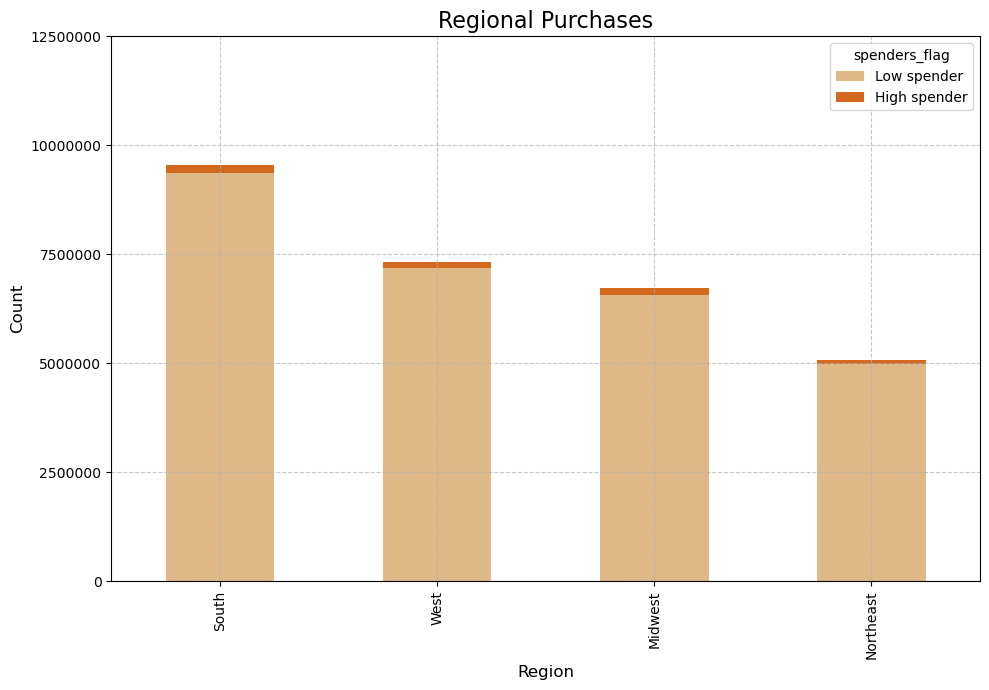

In [113]:
# Create crosstab
region_spenders = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['spenders_flag'])

# Reorder spender columns so 'High spender' is on top (i.e., appears second in stacked bar)
region_spenders = region_spenders[['Low spender', 'High spender']]

# Sort by total spenders
region_spenders['Total'] = region_spenders.sum(axis=1)
region_spenders = region_spenders.sort_values('Total', ascending=False)
region_spenders = region_spenders.drop(columns='Total')

# Plot
ax = region_spenders.plot(kind='bar', stacked=True,
                          color=['burlywood', 'chocolate'],
                          figsize=(10, 7))
# Customizations
plt.title('Regional Purchases', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,15000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'regional_purchases.png'))
# Show chart
plt.show()

### Interpretetion

- **The South** represents the largest market opportunity in terms of volume, and might benefit from:
  - Regional campaigns
  - Product bundling
  - Priority delivery initiatives

- **High spenders** make up a small but valuable segment. These customers may warrant:
  - Personalized marketing
  - Loyalty rewards
  - Exclusive offers to increase retention and spending

- **The Northeast region** shows the lowest overall order volume, indicating:
  - A potential underserved region, or
  - One with unique demographic or behavioral patterns that differ from the rest

In [57]:
# save chart
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_spenders.png'))

####The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [59]:
# Create the exclusion flag 
ords_prods_merge['exclusion_flag'] = 'Include'
ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

# Filter the dataset
active_customers = ords_prods_merge[ords_prods_merge['exclusion_flag'] == 'Include']

# Export the filtered dataset
active_customers.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'active_customerss.csv'))

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [20]:
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week', 'hour',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_value',
       'spenders_flag', 'frequency', 'Gender', 'State', 'Age', 'date_joined',
       'houshold', 'fam_status', 'income USD', 'Region', 'exclusion_flag'],
      dtype='object')

In [63]:
#create profiles based on Age and Income
def assign_profile(row):
    # Age categories
    if row['Age'] < 30:
        age_group = 'Young'
    elif 30 <= row['Age'] < 50:
        age_group = 'Adult'
    else:
        age_group = 'Senior'

    # Income levels
    if row['income USD'] < 50000:
        income_group = 'Low'
    elif 50000 <= row['income USD'] < 100000:
        income_group = 'Mid'
    else:
        income_group = 'High'

    # Combine into one profile string
    return f"{age_group} | {income_group} Income "

# Apply function to create a new column
ords_prods_merge['profile'] = ords_prods_merge.apply(assign_profile, axis=1)


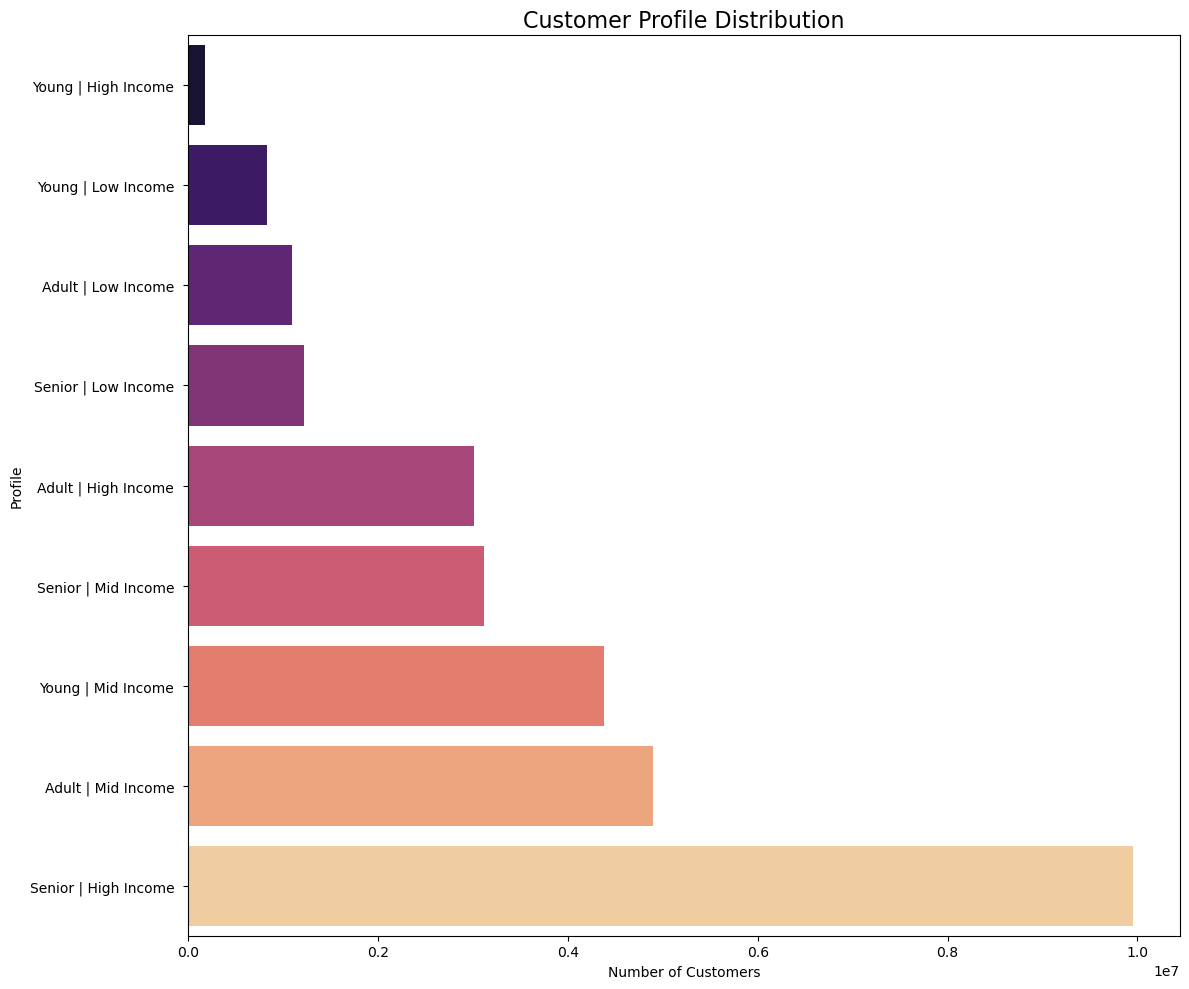

In [115]:

# Crosstab to count each profile
profile_crosstab = pd.crosstab(index=ords_prods_merge['profile'], columns='count')

# Reset index to turn it into a DataFrame
profile_counts = profile_crosstab.reset_index()

# Sort for better visualization (optional: ascending=True shows smallest profiles at top of bar chart)
profile_counts = profile_counts.sort_values(by='count', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(data=profile_counts, y='profile', x='count', hue='profile', palette='magma', dodge=False, legend=False)
plt.title('Customer Profile Distribution', fontsize=16)
plt.xlabel('Number of Customers')
plt.ylabel('Profile')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Customer Profile Distribution.png'))
plt.show()

### Interpretation

- The **largest customer segment** is **Senior | High Income**, followed by:
  - Adult | Mid Income
  - Young | Mid Income
  - Senior | Mid Income

- **Mid-income groups** are consistently well-represented across age categories, indicating they form a core part of Instacart’s customer base.

- **Low income profiles** (especially Young | Low Income and Adult | Low Income) have significantly smaller representation, suggesting:
  - Less frequent usage of Instacart
  - Potential cost sensitivity or access barriers

- The **Young | High Income** segment is the **smallest** of all profiles, which may indicate:
  - A niche market
  - Less interest or need in online grocery delivery among younger high earners

In [108]:
profiling = ords_prods_merge['profile'].value_counts(dropna = False)
profiling

profile
Senior | High Income     9952114
Adult | Mid Income       4899506
Young | Mid Income       4378394
Senior | Mid Income      3119680
Adult | High Income      3006184
Senior | Low Income      1216858
Adult | Low Income       1092098
Young | Low Income        831046
Young | High Income       172169
Name: count, dtype: int64

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [70]:
# Performing Multiple Aggregations
ords_prods_merge.groupby('profile').agg({
    'frequency': ['mean', 'min', 'max'],
    'avg_value': ['mean', 'min', 'max']
})

frequency                   avg_value            \
                            mean       min   max        mean       min   
profile                                                                  
Adult | High Income    11.026911  0.000000  30.0   19.816034  7.000000   
Adult | Low Income     11.720069  0.000000  30.0    6.788014  1.000000   
Adult | Mid Income     11.025545  0.000000  30.0    8.306201  1.100000   
Senior | High Income   11.049727  0.000000  30.0   13.300010  7.000000   
Senior | Low Income    11.480751  0.000000  30.0    6.511910  1.000000   
Senior | Mid Income    11.135970  0.166667  30.0    8.583141  1.100000   
Young | High Income    10.897064  1.157895  30.0  130.104769  7.001282   
Young | Low Income     11.635012  0.318182  30.0    6.892871  1.000000   
Young | Mid Income     11.037419  0.000000  30.0    8.529201  6.998039   

                                     
                                max  
profile                              
Adult | High Income    25005.425000  
Adult | Low Income        12.411111  
Adult | Mid Income      7700.025641  
Senior | High Income   14042.512281  
Senior | Low Income        8.100000  
Senior | Mid Income     2550.966102  
Young | High Income    10209.987755  
Young | Low Income        13.878571  
Young | Mid Income      3402.921296

In [72]:
#create profiles based on certain goods in the “department_id” column, and the number of dependents
def assign_profile_dep(row):
    # Dependents
    if row['houshold'] == 0:
        family_status = 'Single'
    elif 1 <= row['houshold'] <= 2:
        family_status = 'Young Parent'
    else:
        family_status = 'Family'

    # Department type (product-based interest)
    dept_interest = {
        4: 'Produce Shopper',
        14: 'Snack Enthusiast',
        13: 'Meat Buyer',
        7: 'Dairy Lover',
        19: 'Beverage Fan'
    }.get(row['department_id'], 'General Shopper')

    # Combine into one profile string
    return f"{family_status} | {dept_interest} interest "

# Apply function to create a new column
ords_prods_merge['profile2'] = ords_prods_merge.apply(assign_profile_dep, axis=1)

In [73]:
profiling2 = ords_prods_merge['profile2'].value_counts(dropna = False)
profiling2

profile2
Young Parent | General Shopper interest      6518778
Young Parent | Produce Shopper interest      4190571
Family | General Shopper interest            3274803
Single | General Shopper interest            3252133
Family | Produce Shopper interest            2116327
Single | Produce Shopper interest            2104323
Young Parent | Beverage Fan interest         1279356
Young Parent | Dairy Lover interest          1191029
Young Parent | Meat Buyer interest            826709
Single | Beverage Fan interest                641149
Family | Beverage Fan interest                638907
Single | Dairy Lover interest                 598216
Family | Dairy Lover interest                 592725
Family | Meat Buyer interest                  412949
Single | Meat Buyer interest                  410138
Young Parent | Snack Enthusiast interest      311902
Single | Snack Enthusiast interest            154431
Family | Snack Enthusiast interest            153603
Name: count, dtype: int64

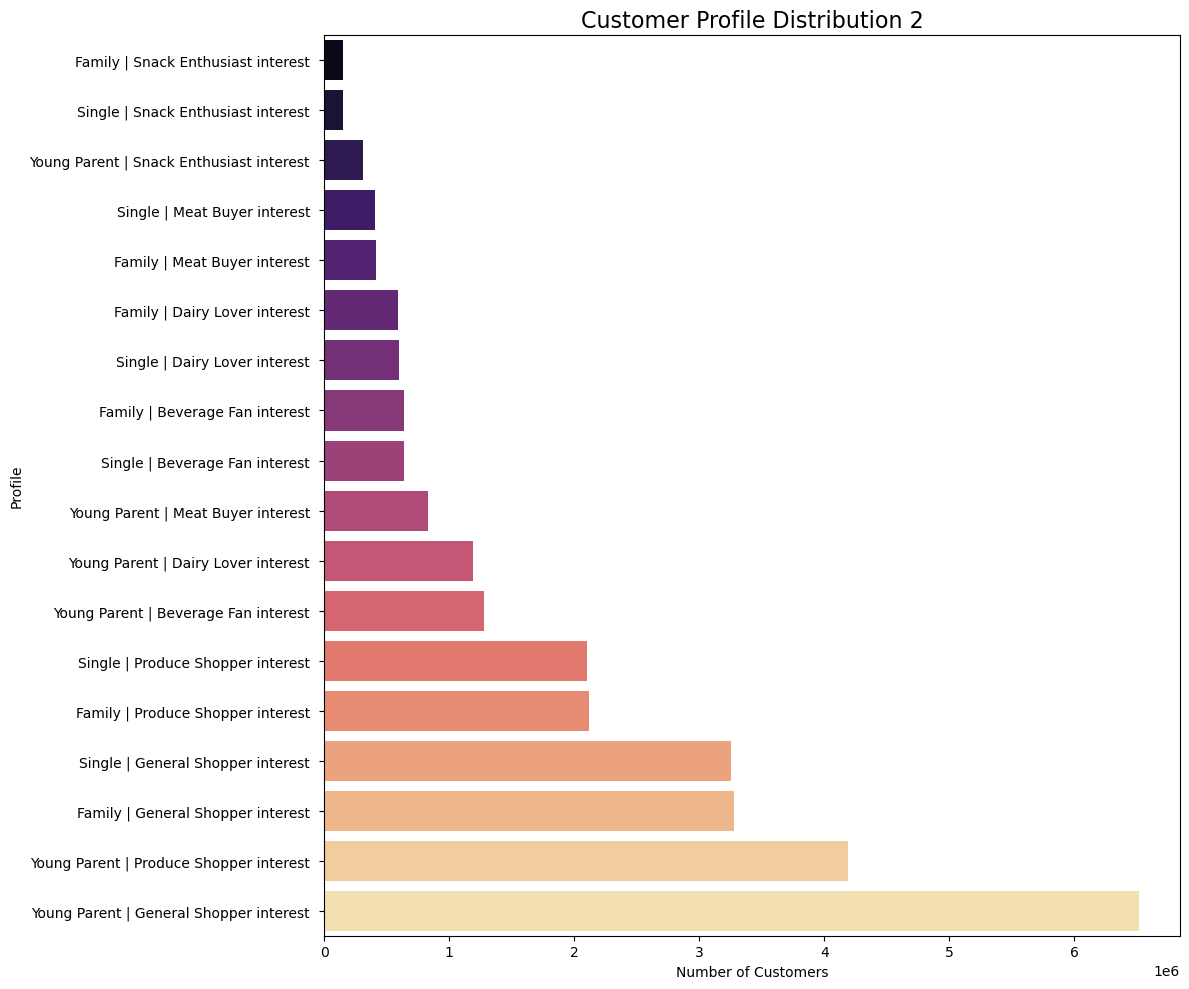

In [74]:
# Group by profile2 and count
profile_counts2 = ords_prods_merge.groupby('profile2').size().reset_index(name='count')

# Sort for better visualization
profile_counts2 = profile_counts2.sort_values(by='count', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(
    data=profile_counts2,
    y='profile2',
    x='count',
    hue='profile2',            # Assign hue to use palette correctly
    palette='magma',
    legend=False,
    dodge=False                # Prevent duplicated bars
)

plt.title('Customer Profile Distribution 2', fontsize=16)
plt.xlabel('Number of Customers')
plt.ylabel('Profile')
plt.tight_layout()
plt.show()

###  Interpretation:
- **General and Produce categories** are essential pillars of customer behavior, especially for **young parents** and **families**.
- Niche interest categories such as **Snack Enthusiasts**, **Dairy Lovers**, and **Meat Buyers** represent smaller but potentially **high-value segments** for specialized marketing.

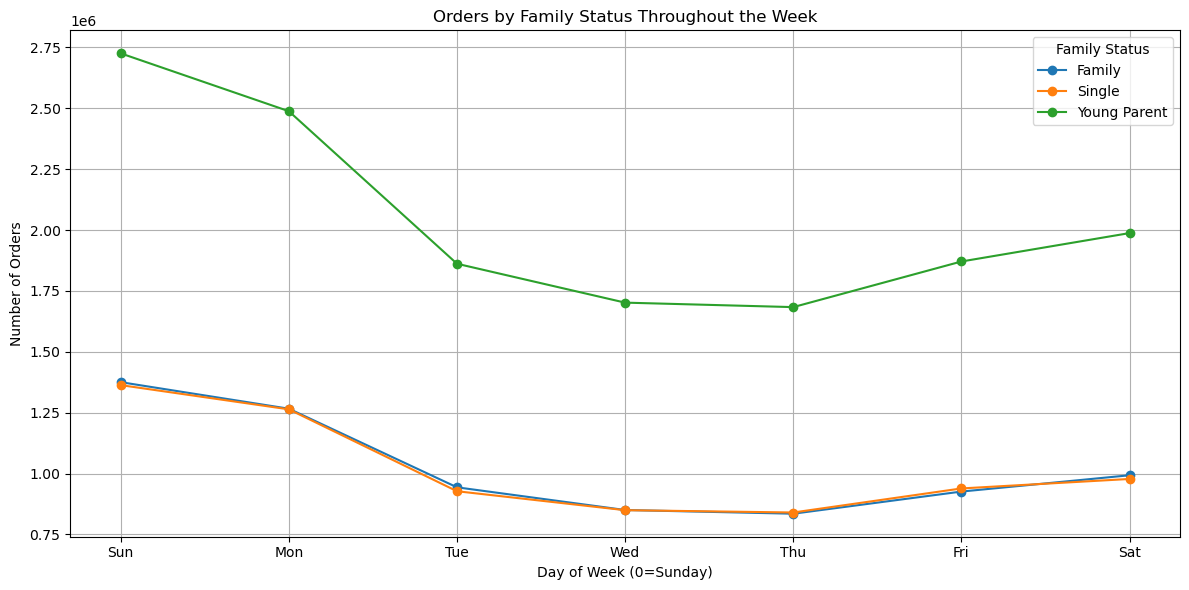

In [117]:
# Extract 'family_status' using str.split
ords_prods_merge['family_status'] = ords_prods_merge['profile2'].str.split(' \\| ').str[0]
# Group data by day of the week and family status, count orders
weekly_profile = ords_prods_merge.groupby(['orders_day_of_week', 'family_status']).size().reset_index(name='order_count')

# Pivot data for plotting
weekly_pivot = weekly_profile.pivot(index='orders_day_of_week', columns='family_status', values='order_count')

# Plot line chart
Weekly_linechart = weekly_pivot.plot(kind='line', figsize=(12, 6), marker='o')

# Customize plot
plt.title('Orders by Family Status Throughout the Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Family Status')
plt.grid(True)
plt.tight_layout()

#Safe chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Orders by Family Status Throughout the Week.png'))

# Show chart
plt.show()

### Interpretation:
- **Sunday and Monday** are peak shopping days for **all customer types**, particularly for **Young Parents**.
- Midweek (Tue–Thu) appears to be the **quietest period**, which may present opportunities for promotions or campaigns to **boost engagement** during those days.
- The consistently higher volume from **Young Parents** reinforces their importance as a **core customer segment** for Instacart.
---


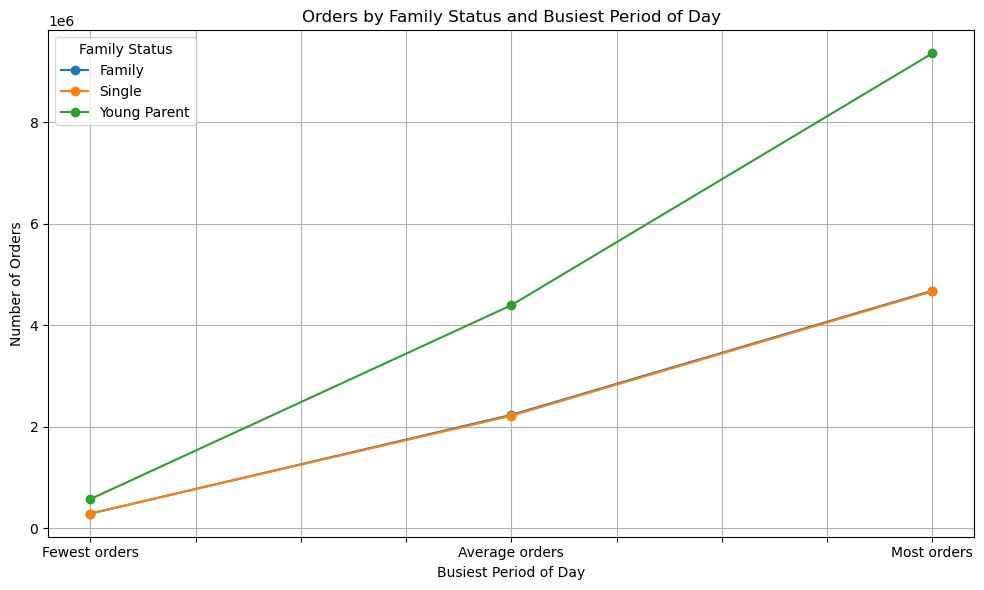

In [119]:
# Create a crosstab of order counts
period_pivot = pd.crosstab(
    index=ords_prods_merge['busiest_period_of_day'],
    columns=ords_prods_merge['family_status']
)

# Reorder rows for proper X-axis order
order = ['Fewest orders', 'Average orders', 'Most orders']
period_pivot = period_pivot.reindex(order)

# Plot line chart
period_of_the_day_linechart = period_pivot.plot(
    kind='line',
    marker='o',
    figsize=(10, 6)
)

# Customize plot
plt.title('Orders by Family Status and Busiest Period of Day')
plt.xlabel('Busiest Period of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Family Status')
plt.grid(True)
plt.tight_layout()

#Safe chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Orders by Family Status and Busiest Period of Day.png'))

# Show chart
plt.show()

In [155]:
### 📌 Interpretation:
- The data suggests that **Young Parents are highly responsive during peak activity periods**, possibly due to more structured or time-constrained shopping behavior.
- **All family statuses increase their order activity** in line with busier dayparts, but **Young Parents scale their activity at a much higher rate**.

---

SyntaxError: invalid syntax (2927389502.py, line 2)

### Interpretation:
- The data suggests that **Young Parents are highly responsive during peak activity periods**, possibly due to more structured or time-constrained shopping behavior.
- **All family statuses increase their order activity** in line with busier dayparts, but **Young Parents scale their activity at a much higher rate**.

---

## Comparison of customer profiles with regions and departments. 

In [87]:
# Crosstab of profiles by region
pivot_region = pd.crosstab(
    index=ords_prods_merge['Region'],
    columns=ords_prods_merge['profile']
)

# Optional: fill NaNs with 0 (not needed here since crosstab outputs 0 by default)
# pivot_region = pivot_region.fillna(0)

# Display the pivot table
display(pivot_region)

profile,Adult | High Income,Adult | Low Income,Adult | Mid Income,Senior | High Income,Senior | Low Income,Senior | Mid Income,Young | High Income,Young | Low Income,Young | Mid Income
Region,,,,,,,,,
Midwest,737222,265235,1119493,2363451,271631,704112,45199,198030,1009830
Northeast,530088,192657,853515,1787112,216642,544646,23010,140592,787130
South,974249,369929,1671638,3267859,414137,1037524,60495,282024,1467305
West,764625,264277,1254860,2533692,314448,833398,43465,210400,1114129


In [89]:
# Crosstab of profiles by region
pivot_region = pd.crosstab(
    index=ords_prods_merge['Region'],
    columns=ords_prods_merge['profile2']
)

# pivot_region = pivot_region.fillna(0)

# Display the pivot table
display(pivot_region)


profile2,Family | Beverage Fan interest,Family | Dairy Lover interest,Family | General Shopper interest,Family | Meat Buyer interest,Family | Produce Shopper interest,Family | Snack Enthusiast interest,Single | Beverage Fan interest,Single | Dairy Lover interest,Single | General Shopper interest,Single | Meat Buyer interest,Single | Produce Shopper interest,Single | Snack Enthusiast interest,Young Parent | Beverage Fan interest,Young Parent | Dairy Lover interest,Young Parent | General Shopper interest,Young Parent | Meat Buyer interest,Young Parent | Produce Shopper interest,Young Parent | Snack Enthusiast interest
Region,,,,,,,,,,,,,,,,,,
Midwest,142925,133702,751751,96998,486441,35027,150653,138424,769522,97137,496935,36854,302554,281316,1534087,194292,993181,72404
Northeast,115898,105732,580117,72720,376245,26194,112050,106696,570469,71803,365051,27325,229406,216626,1154383,146573,742507,55597
South,211311,200417,1093637,136800,699904,51427,215782,201115,1079218,135004,699344,50803,420595,394197,2170870,275699,1405443,103594
West,168773,152874,849298,106431,553737,40955,162664,151981,832924,106194,542993,39449,326801,298890,1659438,210145,1049440,80307


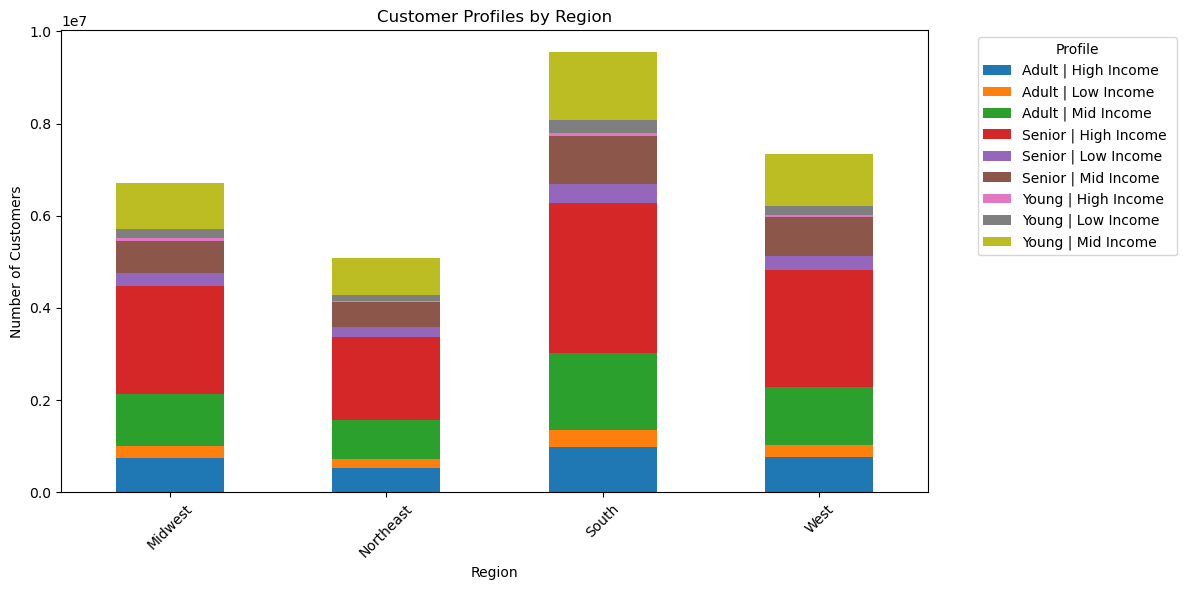

In [121]:
# Plot stacked bar chart
profile_by_region = pivot_region.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customizing the plot
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.xticks(rotation=45)
plt.tight_layout()

#Safe chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Customer Profiles by Region.png'))

# Show chart
plt.show()

### Interpretation:
- There is a **strong presence of high-income seniors** across the U.S., especially in the South and West, suggesting this demographic is a key revenue driver for Instacart.
- The **mid-income segments** (both Adult and Young) are consistent and valuable, signaling stable engagement from economically active users.
- **Low and high extremes of the younger demographic** are niche segments and may require tailored messaging or incentive models to grow.
---

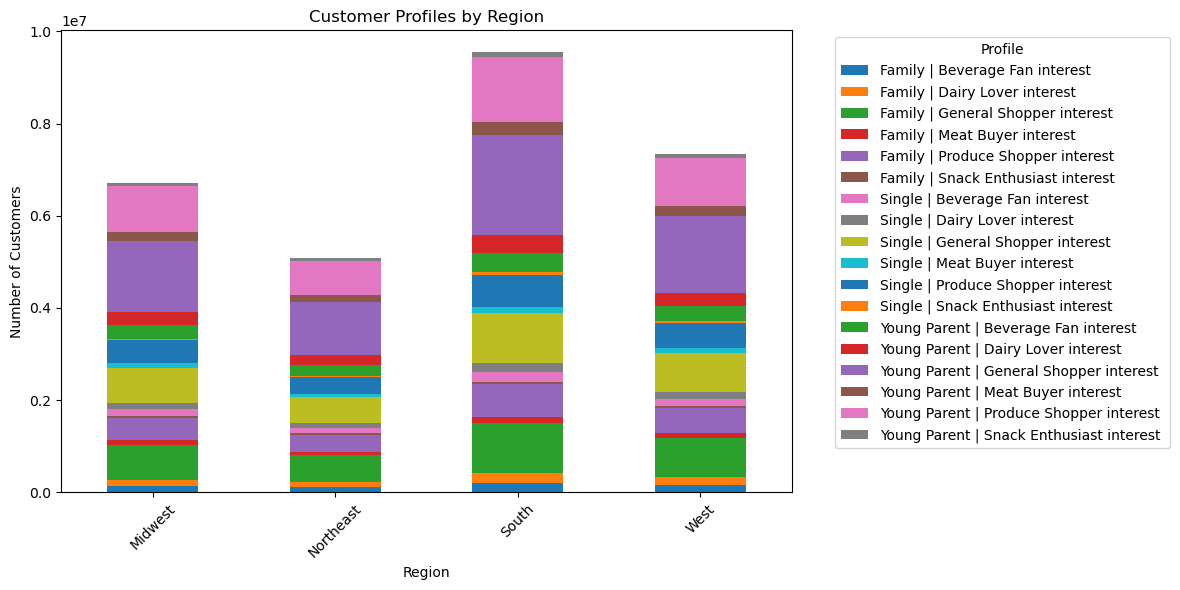

In [162]:
# Create crosstab
pivot_region = pd.crosstab(
    index=ords_prods_merge['Region'],
    columns=ords_prods_merge['profile2']
)

# Plot stacked bar chart
profile_by_region_2 = pivot_region.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customizing the plot
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.xticks(rotation=45)
plt.tight_layout()

#Safe chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Customer Profiles by Region2.png'))

# Show chart
plt.show()

### Interpretation:
- **Young Parents and Families** are central to Instacart's customer base, particularly in categories like **Produce**, **General Shopping**, and to a lesser degree, **Meat Buying**.
- There is **regional consistency** in dominant interests, with slight variations (e.g., more diverse interest profiles in the South).
- The **Northeast** not only has the lowest customer count but also the **least variety in interests**, indicating potential for focused growth.
---

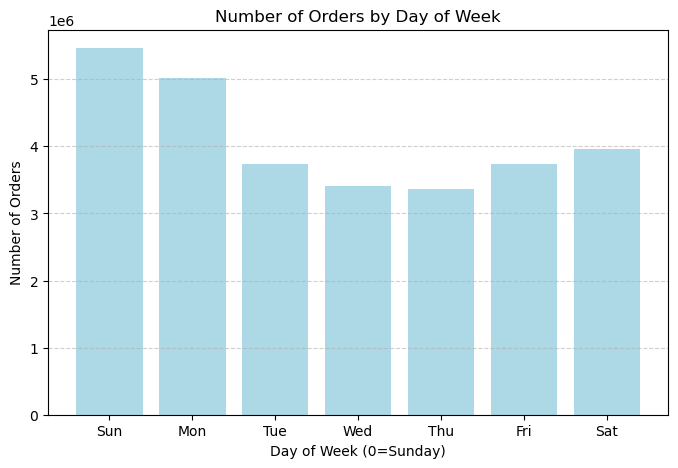

In [101]:
# Crosstab to count orders per day of week
busiest_days = pd.crosstab(
    index=ords_prods_merge['orders_day_of_week'],
    columns='order_count'
).reset_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(busiest_days['orders_day_of_week'], busiest_days['order_count'], color='lightblue')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'days_of_week.png'))

#Show chart
plt.show()

### Interpretation:
- Customers show a strong preference for placing orders at the **beginning and end of the week**, likely aligning with weekly meal planning and restocking needs.
- The **midweek lull** suggests a reduced sense of urgency or routine purchasing behavior during these days.
---

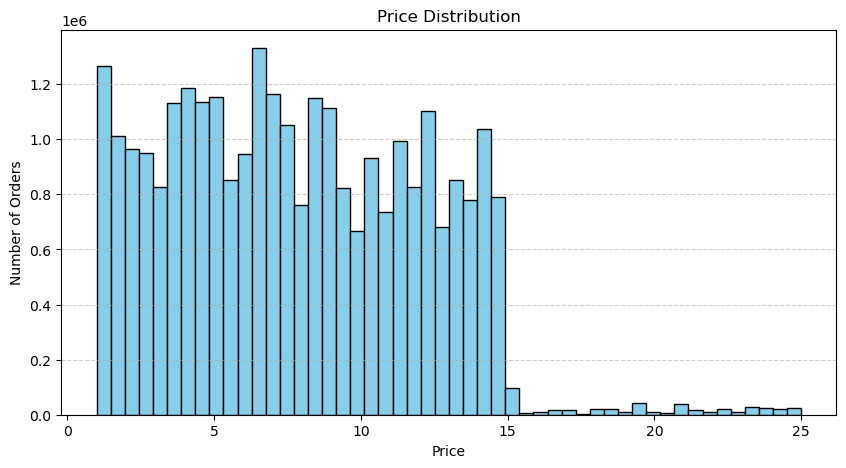

In [126]:
# Plot histogram of prices
plt.figure(figsize=(10,5))
ords_prods_merge['prices'].plot.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Price Distribution.png'))

# Chow chart
plt.show()

###  Interpretation:
- The vast majority of products ordered are priced **between $1 and $15**, with the **highest frequency in the $1–$5 range**.
- There is a **sharp decline** in the number of orders for products priced above **$15**, and orders become extremely rare beyond **$18**.
- The distribution is **right-skewed**, with a **long tail of low-volume high-priced items** extending up to ~$25.
- Most customers are purchasing **affordable everyday grocery items**, which aligns with typical shopping habits for essentials.
- High-priced items are **less frequently ordered**, likely due to budget sensitivity or lower stocking frequency (e.g., specialty products).
---

In [168]:
# Check price distribution by quantiles
quantiles = ords_prods_merge['prices'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(quantiles)

0.10     2.3
0.25     4.2
0.50     7.4
0.75    11.3
0.90    13.6
0.95    14.3
0.99    18.2
Name: prices, dtype: float64


In [130]:
# Define bins using quantiles
bins = [0,
        ords_prods_merge['prices'].quantile(0.25),
        ords_prods_merge['prices'].quantile(0.75),
        ords_prods_merge['prices'].max()]
labels = ['Low', 'Mid', 'High']

ords_prods_merge['price_range'] = pd.cut(ords_prods_merge['prices'], bins=bins, labels=labels, include_lowest=True)

# Count by range
ords_prods_merge['price_range'].value_counts().sort_index()

price_range
Low      7197068
Mid     14480181
High     6986352
Name: count, dtype: int64

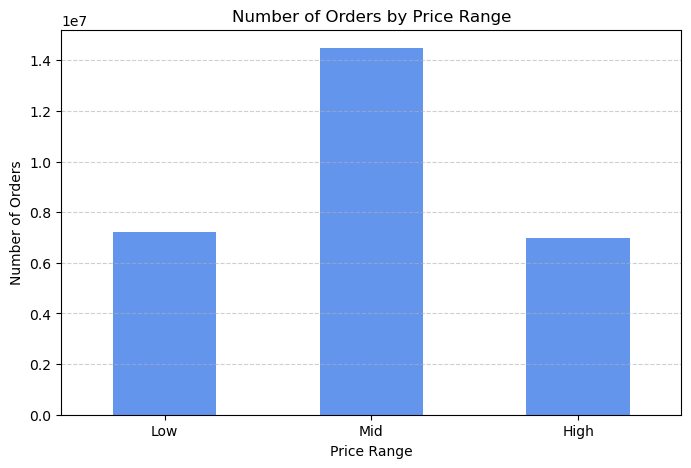

In [132]:
# Count number of orders in each range
price_range_counts = ords_prods_merge['price_range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
price_range_countsplt = price_range_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Number of Orders by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Save figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'Number of Orders by Price Range.png'))

# Chow chart

plt.show()

### Interpretation:
- Customers clearly favor **mid-range priced items**, suggesting a comfort zone for spending in that range.
- This supports the idea that shoppers are value-conscious but not necessarily driven to the cheapest options.
- The relatively balanced share of low and high price range orders implies there are **distinct customer segments or purchase intents** (e.g., daily staples vs. premium or bulk items).
---

In [135]:
# Calculate 25th and 75th percentiles
low_cutoff = ords_prods_merge['prices'].quantile(0.25)
high_cutoff = ords_prods_merge['prices'].quantile(0.75)

# Print the actual values
print(f"Low < {low_cutoff:.2f}, Mid = {low_cutoff:.2f}–{high_cutoff:.2f}, High > {high_cutoff:.2f}")

Low < 4.20, Mid = 4.20–11.30, High > 11.30


In [137]:
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week', 'hour',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_value',
       'spenders_flag', 'frequency', 'Gender', 'State', 'Age', 'date_joined',
       'houshold', 'fam_status', 'income USD', 'Region', 'exclusion_flag',
       'profile', 'profile2', 'family_status', 'price_range'],
      dtype='object')

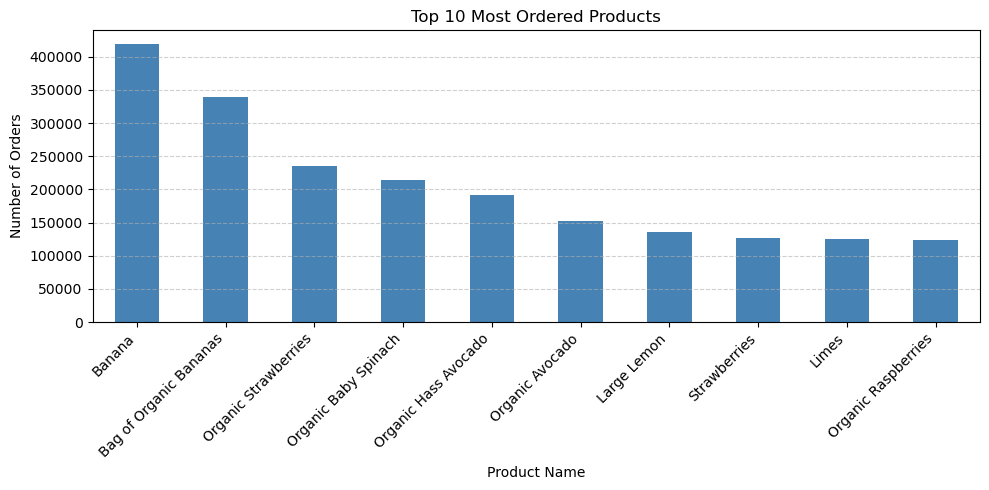

In [139]:
top_products = ords_prods_merge['product_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_products.png'))

plt.show()

### Interpretation:
- Instacart customers show a strong preference for **organic and fresh produce**, indicating health-conscious and quality-oriented shopping behavior.
- The presence of both **bulk items (e.g., bag of bananas)** and **single-unit items (e.g., lemon, avocado)** suggests a mix of **individual and household shoppers**.
---


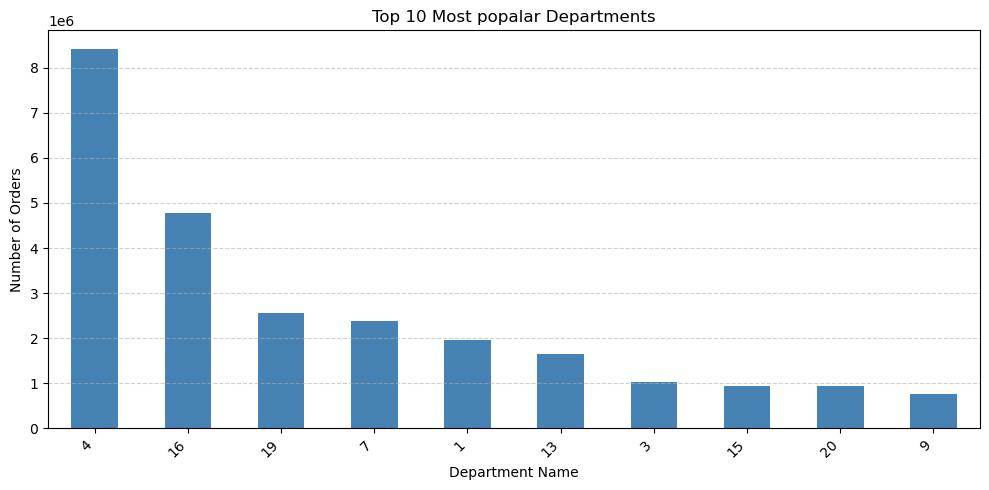

In [187]:
top_depts = ords_prods_merge['department_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_depts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most popalar Departments')
plt.xlabel('Department Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_depts.png'))

plt.show()

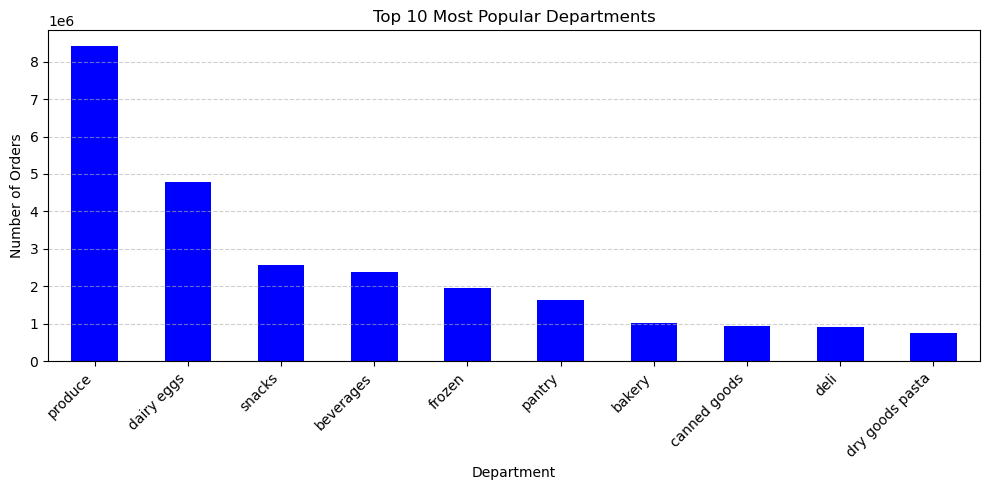

In [191]:
# Import and fix department file
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Departments.csv'), header=None)

# Transpose and reset columns
df_dep = df_dep.T
df_dep.columns = ['department_id', 'department']
df_dep = df_dep[1:]
df_dep['department_id'] = df_dep['department_id'].astype(int)

# Drop existing 'department' column if present
if 'department' in ords_prods_merge.columns:
    ords_prods_merge = ords_prods_merge.drop(columns='department')

# Merge department names into main dataframe
ords_prods_merge = ords_prods_merge.merge(df_dep, on='department_id', how='left')

top_depts = ords_prods_merge['department'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_depts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Popular Departments')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_depts_named.png'))
plt.show()

### Interpretation:
- Customers prioritize **fresh and staple items**, especially fresh produce and dairy, as part of their regular grocery habits.
- The strong presence of snacks and beverages suggests **convenience and impulse items** are also frequently added to carts.
- Lower-order departments may represent opportunities for **cross-selling or seasonal promotions**.
---


In [181]:
# Export the updated DataFrame
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_10.pkl'))